In [1]:
#1.Розробити звичайний автокодувальник  для датасету рукописних цифр MNIST на основі багатошарової нейронної мережі.

# Підключення необхідних бібліотек

import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow.keras import layers, models, datasets

In [2]:
# Завантаження та підготовка даних

(x_train, _), (x_test, _) = datasets.mnist.load_data()



x_train = x_train.astype('float32') / 255.

x_test = x_test.astype('float32') / 255.



# Додавання шуму до зображень

noise_factor = 0.5

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)

x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)



x_train_noisy = np.clip(x_train_noisy, 0., 1.)

x_test_noisy = np.clip(x_test_noisy, 0., 1.)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Визначення архітектури звичайного автокодувальника (багатошарова нейронна мережа)

input_img = tf.keras.Input(shape=(28, 28))



x = layers.Flatten()(input_img)

x = layers.Dense(128, activation='relu')(x)

x = layers.Dense(64, activation='relu')(x)

encoded = layers.Dense(32, activation='relu')(x)



x = layers.Dense(64, activation='relu')(encoded)

x = layers.Dense(128, activation='relu')(x)

x = layers.Dense(784, activation='sigmoid')(x)

decoded = layers.Reshape((28, 28))(x)



autoencoder = models.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')



# Тренування автокодувальника

history = autoencoder.fit(x_train_noisy, x_train,

                epochs=20,

                batch_size=128,

                shuffle=True,

                validation_data=(x_test_noisy, x_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.2954 - val_loss: 0.1741
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1696 - val_loss: 0.1553
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1545 - val_loss: 0.1483
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1468 - val_loss: 0.1425
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1418 - val_loss: 0.1382
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.1376 - val_loss: 0.1346
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1344 - val_loss: 0.1323
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1318 - val_loss: 0.1313
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1297 - val_loss: 0.1284
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1281 - val_loss: 0.1273
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1266 - val_loss: 0.1257
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step

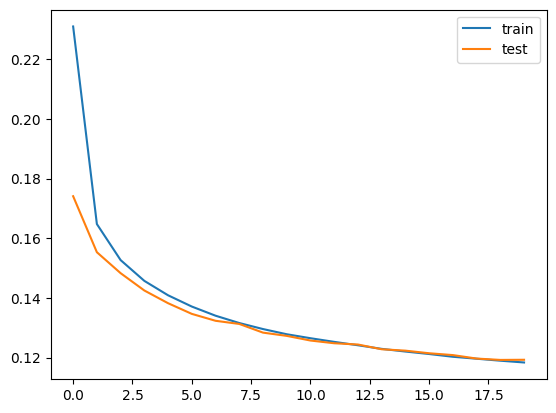

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


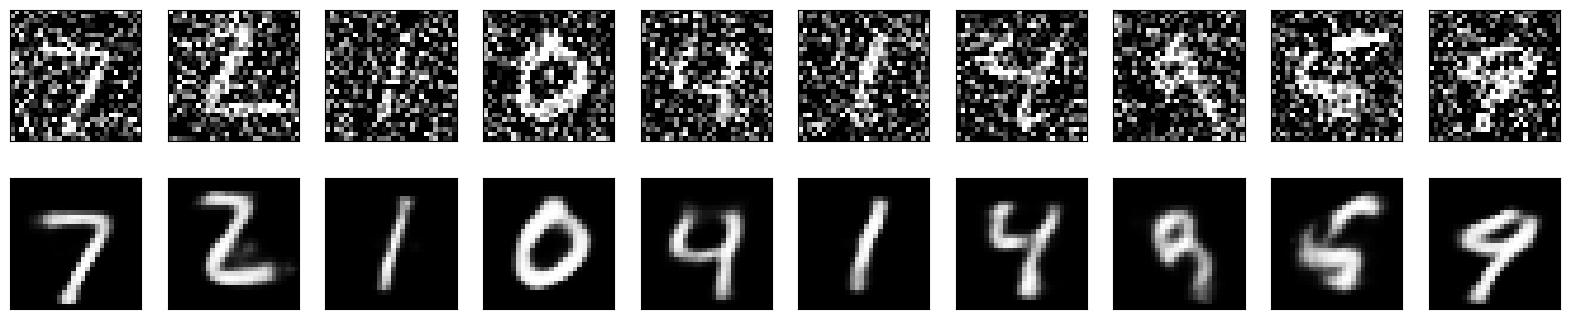

In [4]:
# Графік функції втрат

plt.plot(history.history['loss'], label='train')

plt.plot(history.history['val_loss'], label='test')

plt.legend()

plt.show()

# Результати реконструкції

decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10

plt.figure(figsize=(20, 4))

for i in range(n):

    # вхідні зображення

    ax = plt.subplot(2, n, i + 1)

    plt.imshow(x_test_noisy[i])

    plt.gray()

    ax.get_xaxis().set_visible(False)

    ax.get_yaxis().set_visible(False)



    # відновлені зображення

    ax = plt.subplot(2, n, i + 1 + n)

    plt.imshow(decoded_imgs[i])

    plt.gray()

    ax.get_xaxis().set_visible(False)

    ax.get_yaxis().set_visible(False)

plt.show()
